# Validation of Approximation Synchrotron Radiation and Proton Synchrotron

In [10]:
import naima
import CRadpy
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import agnpy

In [11]:
def function(energy, cut = 13* u.TeV):
    amplitude = 1e36 * u.Unit("1/eV")
    E0        = 1 * u.TeV
    index     = 2.1
    cutoff    = cut
    return amplitude * np.power(energy/E0, -1 * index) * np.exp( -1 * np.power(energy/cutoff, 1))
energy = np.logspace(1, 5, 90) * u.TeV
energy = energy.to("erg")
electron_density = function(energy).to("erg^-1")
proton_density = function(energy, cut = 200 * u.TeV).to("erg^-1")

distance = 1000 * CRadpy.constants.pc_to_cm
rad =  CRadpy.Radiation()
rad2 = CRadpy.Radiation()

In [12]:
rad.SetElectronDistribution(energy.value, electron_density.value)
rad.SetProtonDistribution(energy.value, proton_density.value)
rad.SetB_Field(1)
rad.SetDistance(distance)

rad2.SetElectronDistribution(energy.value, electron_density.value)
rad2.SetProtonDistribution(energy.value, proton_density.value)
rad2.SetB_Field(1)
rad2.SetDistance(distance)
rad2.SetSynApprox()

In [13]:
spectrum_energy = np.logspace(-1, 14, 500) * CRadpy.constants.eV_to_erg
rad.CalculateDifferentialSpectrum(spectrum_energy)
rad2.CalculateDifferentialSpectrum(spectrum_energy)

**First we check the correct of approximation version of Electron Synchrotron radiation**

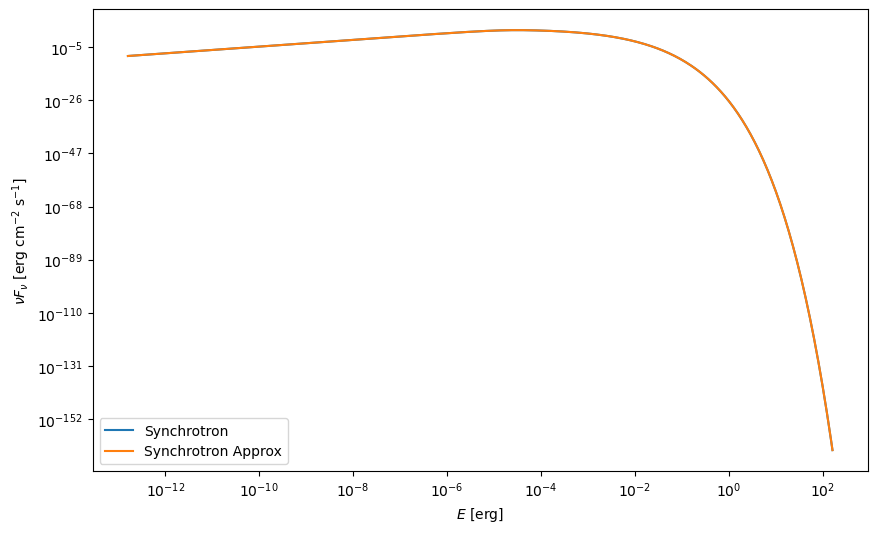

In [14]:
syn1 = rad.GetSynSpectrum() * np.power(spectrum_energy,2)
syn2 = rad2.GetSynSpectrum() * np.power(spectrum_energy,2)

plt.figure(figsize=(10,6))
plt.ylabel(r'$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]')
plt.xlabel(r'$E$ [erg]')
plt.loglog(spectrum_energy, syn1, label = "Synchrotron")
plt.loglog(spectrum_energy, syn2, label = "Synchrotron Approx")
plt.legend()

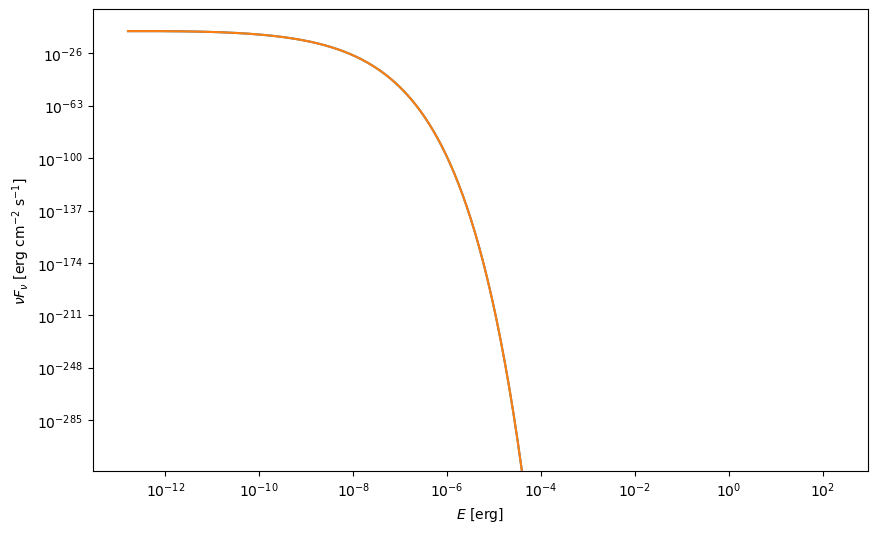

In [15]:
proton_syn = rad.GetProtonSynSpectrum() * np.power(spectrum_energy,2)
proton_syn2 = rad2.GetProtonSynSpectrum() * np.power(spectrum_energy,2)
plt.figure(figsize=(10,6))
plt.ylabel(r'$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]')
plt.xlabel(r'$E$ [erg]')
plt.loglog(spectrum_energy, proton_syn, label = "Proton Synchrotron")
plt.loglog(spectrum_energy, proton_syn2, label = "Proton Synchrotron Approx")